### Read a waveform and plot

  * Zet dit notebook in "<base_dir>/FineStructure/
  * Select the right filename with waveform data and presto!
  * -m osc


In [1]:
n = 50000

In [2]:
import sys
sys.path.insert(0,'python/')
import struct
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as ss

from scipy.stats import norm
from tqdm import trange
from scipy.signal import find_peaks

# import data handling claZss
#from DT5550_Waveform import *

In [5]:
# specify your filename that contains teh waveform data
# filename = 'C:/Users/flori/Desktop/python/testwave.data'
# # open the waveform datafile
# io = DT5550_Waveform(file=filename)
file = open("C:/Users/flori/Desktop/python/testwave.data", "r")

In [6]:
# io = DT5550_Waveform(file=filename)
bovenste_detector = []
onderste_detector = []
for i in trange(n):
    io.read_event()
    idet = 0
    somatie1 = sum(io.analog[idet][:-2][:200])
    baseline1 = somatie1 / 200
    nieuwe_data1 = io.analog[idet][:-2] - baseline1
    idet = 1
    somatie2 = sum(io.analog[idet][:-2][:200])
    baseline2 = somatie2 / 200
    nieuwe_data2 = io.analog[idet][:-2] - baseline2
    bovenste_detector.append(nieuwe_data1)
    onderste_detector.append(nieuwe_data2)

  0%|                                                                                        | 0/50000 [00:00<?, ?it/s]


NameError: name 'io' is not defined

In [217]:
bov_cutoff_list = []
ond_cutoff_list = []

for i in trange(n):
    #cut all events before 250 clockseconds
    if max(bovenste_detector[i][:250]) < 30 and max(onderste_detector[i][:250]) < 30:
        #each max hit event should be above 50
        if max(bovenste_detector[i]) > 50 and max(onderste_detector[i]) > 50:
            #each max hit should lie around 250ns, as we believe that is what the firmware does
            if max(bovenste_detector[i][:300]) > 50 and max(onderste_detector[i][:300]) > 50:
                bov_cutoff_list.append(np.array(bovenste_detector[i])/max(bovenste_detector[i]))
                ond_cutoff_list.append(np.array(onderste_detector[i])/max(onderste_detector[i]))
#                 bov_cutoff_list.append(np.array(bovenste_detector[i]))
#                 ond_cutoff_list.append(np.array(onderste_detector[i]))

print(len(ond_cutoff_list), len(bov_cutoff_list))

100%|██████████████████████████████████████████████████████████████████████████| 10000/10000 [00:01<00:00, 7902.05it/s]

3769 3769


100%|███████████████████████████████████████████████████████████████████████████| 3769/3769 [00:00<00:00, 48940.54it/s]


1224


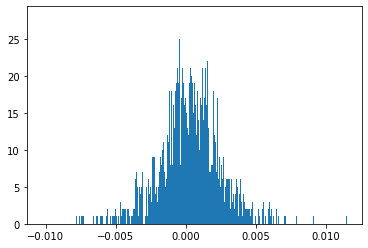

In [218]:
selected_data_list_top = []
selected_data_list_bottom = []
int_list = []
counter = 0
for i in trange(len(bov_cutoff_list)):
    integraal1= np.trapz(ond_cutoff_list[i]) * (12.5*10**-9) * 10000
    integraal2= np.trapz(bov_cutoff_list[i]) * (12.5*10**-9) * 10000
    int_list.append(integraal1-integraal2)
    
    if integraal1-integraal2 > 0.001:
        counter += 1
        selected_data_list_top.append(bov_cutoff_list[i])
        selected_data_list_bottom.append(ond_cutoff_list[i])

print(counter)
plt.hist(int_list, 1000)
# plt.xlim(0, 10)
plt.show()

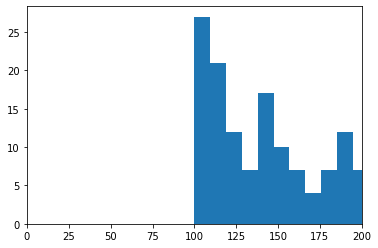

In [368]:
distance_list = []

for i in range(counter):
#     print(len(find_peaks(selected_data_list_bottom[i], 0.25, distance = 25, threshold=0.06)[0]))
    if len(find_peaks(selected_data_list_bottom[i], 0.25, distance = 100, threshold=0.06)[0]) >=2:
        distance = find_peaks(selected_data_list_bottom[i], 0.25, distance = 100, threshold=0.06)[0][1] - find_peaks(selected_data_list_bottom[i], 0.25, distance = 100, threshold=0.06)[0][0]
        distance_list.append(distance)
#         print("JA JAJAJAJ", distance)
        
#     plt.plot(selected_data_list_top[i])
#     plt.plot(selected_data_list_bottom[i])
#     plt.show()
    
plt.hist(distance_list, 70)
plt.xlim(0,200)
plt.show()

In [369]:
def exponential(t, N0,labda):
    return N0*np.exp(-labda*t)

2.2344798303529225e-06


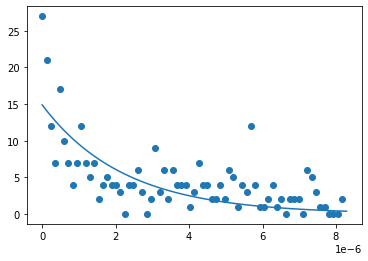

In [372]:
bins = plt.hist(distance_list, 70)
plt.close()
loca = ((bins[1]-100) * 12.5 * 10**(-9))
bins = bins[0]

p0 = (10, 454545)

params, cv = scipy.optimize.curve_fit(exponential, loca[:-1], bins, p0)

N0, labda = params

print(1/labda)
plt.scatter(loca[:-1], bins)
plt.plot(np.linspace(0,loca[-1],1000), exponential(np.linspace(0,loca[-1],1000), N0, labda ))
plt.show()

In [ ]:
nevent = 1000
integraal_lijst = []

for b in trange(nevent):
    io.read_event()
    idet = 1
    somatie1 = sum(io.analog[idet][:-2][:100])
    baseline1 = somatie1 / 100
    nieuwe_data1 = io.analog[idet][:-2] - baseline1
    integraal1= np.trapz(nieuwe_data1[250:400],((12.5*10**-9)*np.linspace(250,400,150)))
    
    idet = 0
    somatie2 = sum(io.analog[idet][:-2][:100])
    baseline2 = somatie2 / 100
    nieuwe_data2 = io.analog[idet][:-2] - baseline2
    integraal2= np.trapz(nieuwe_data2[250:400],((12.5*10**-9)*np.linspace(250,400,150)))    

    integraal_lijst.append((integraal1-integraal2)/(integraal1+integraal2))
plt.hist(integraal_lijst,bins=1000)
plt.xlim(-5,5)
plt.show()

In [ ]:
plt.hist(integraal_lijst,bins=1000)
plt.axvline(x=1.5)
plt.xlim(-5,5)
plt.show()


In [ ]:
sliced = []

for i in range(len(integraal_lijst)):
    if integraal_lijst[i] > 1.5:
        sliced.append(True)
    else:
        sliced.append(False)

io = DT5550_Waveform(file=filename)

In [ ]:
i = 0

for i in range(len(io.analog[idet][:-2])):
    io.read_event()
    if sliced[i]:
        idet = 0
        somatie1 = sum(io.analog[idet][:-2][:100])
        baseline1 = somatie1 / 100
        nieuwe_data1 = io.analog[idet][:-2] - baseline1
        plt.plot(nieuwe_data1)
        idet = 1
        somatie2 = sum(io.analog[idet][:-2][:100])
        baseline2 = somatie2 / 100
        nieuwe_data2 = io.analog[idet][:-2] - baseline2
        plt.plot(nieuwe_data2)
        plt.show()

In [ ]:
# detector number between 0 and 7
io = DT5550_Waveform(file=filename)
# plot the analog data: for each detector the waveforms are stored. The last entry of the data array is crap.
for i in range(25):
    io.read_event()
#     idet = 0
#     plt.plot(io.analog[idet][:-2])
    idet = 1
    plt.plot(io.analog[idet][:-2])
    plt.title(i)
    plt.xlabel('time [x12.5 ns]')
    plt.show()

In [ ]:
nevent = 1000
io = DT5550_Waveform(file=filename)
hist_lijst = []
for i in range(nevent):
    io.read_event()
    baseline = 1540
    n = 0 
    first_hit_j = 100000000
    second_hit_j = 0
    idet = 1
    for j in range(len(io.analog[idet][:-2])):
        if io.analog[idet][:-2][j] > baseline + 100 and n==0 :
            n = 1
            # first_hit_j = j
            maximum = max(io.analog[idet][:-2][j:j+20])
            index = np.where(io.analog[idet][:-2][j:j+20] == maximum)
            first_hit_j = index[0][0] + j
            
        if n==1 and j > first_hit_j + 50 and io.analog[idet][:-2][j] > baseline + 75:
            # second_hit_j = j
            maximum2 = max(io.analog[idet][:-2][j:j+20])
            index2 = np.where(io.analog[idet][:-2][j:j+20] == maximum2)
            second_hit_j = index2[0][0] + j
            n = 2
                
    if n==2 and abs(io.analog[idet][:-2][second_hit_j] - io.analog[idet][:-2][first_hit_j]) > 75:
        n = 1
        
    if n==2:
        print("Event number", i)
        print(first_hit_j, second_hit_j)
        print("time is:", abs(first_hit_j - second_hit_j) * 12.5 /1000, "Microseconds")
        print(io.analog[idet][:-2][first_hit_j], io.analog[idet][:-2][second_hit_j])
        print(second_hit_j - first_hit_j)  
        totalmax = max(io.analog[idet][:-2][:])
        print("total maximum ", totalmax)
        totalmaxindex = np.where(io.analog[idet][:-2][:] == totalmax)
        print("total maximum index ", totalmaxindex[0][0])
        hist_lijst.append(second_hit_j - first_hit_j)
plt.hist(hist_lijst)
plt.show()

In [ ]:
plt.hist([x for x in hist_lijst if x > 150],bins=10)
plt.show()

In [ ]:
import numpy as np

x_list = [x for x in range(0, 1001, 100)]
y_list = [0 for x in x_list]

for hist in hist_lijst:
    value = int(hist / 100) * 100
    y_list[x_list.index(value)] += 1
    
values = np.polyfit(np.log(np.array(x_list))[2:], y_list[2:], 1)
print(values)